In [5]:
import json
import random
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches


jsonl_path = "/home/thodemon/workspace/grounded-vsp/output/grounded_vsp_random.jsonl"

with open(jsonl_path, "r") as f:
    lines = f.readlines()

caption: The sink is beneath the cat.
label: True
ref_exp: {'labels': ['sink', 'cat'], 'label_positions': [[4, 8], [24, 27]], 'bboxes': [[19.36, 122.71, 441.34, 327.23], [85.73, 29.04, 235.75, 377.2]]}


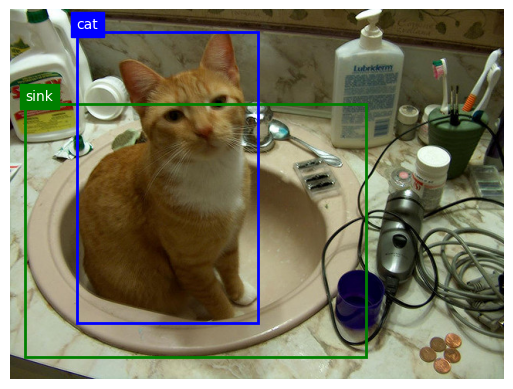

In [6]:
sample = json.loads(random.choice(lines))

try:
    image = Image.open(sample["image_file"])
except FileNotFoundError:
    response = requests.get(sample["image_link"])
    image = Image.open(BytesIO(response.content))

fig, ax = plt.subplots()
ax.imshow(image)

# Draw bounding boxes and labels
for bbox, label, color in zip(sample["ref_exp"]["bboxes"], sample["ref_exp"]["labels"], ["green", "blue"]):
    x, y, w, h = bbox
    rect = patches.Rectangle((x, y), w , h , linewidth=2, edgecolor=color, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y - 5, label, color='white', fontsize=10, backgroundcolor=color)

print(f"caption: {sample['caption']}")
print(f"label: {bool(sample['label'])}")
print(f"ref_exp: {sample['ref_exp']}")

plt.axis('off')
plt.show()